In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import joblib 
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import optuna


In [ ]:
#Loading the dataset

In [2]:
data = pd.read_csv('housing_all_encoded.csv')
data = data.drop(columns= 'Unnamed: 0')

In [3]:
data.head()

,year,floor_area_sqm,range_numeric,lease_commence_date,remaining_lease,resale_price,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,district_East,district_North,district_North-East,district_West
0,1990,-2.506989,0.680780,1977,0.463430,9000.0,False,False,False,False,False,False,False,False,True,False
1,1990,-2.506989,-0.558727,1977,0.463430,6000.0,False,False,False,False,False,False,False,False,True,False
2,1990,-2.506989,0.680780,1977,0.463430,8000.0,False,False,False,False,False,False,False,False,True,False
3,1990,-2.506989,0.061026,1977,0.463430,6000.0,False,False,False,False,False,False,False,False,True,False
4,1990,-0.879230,-0.558727,1976,0.371238,47200.0,False,True,False,False,False,False,False,False,True,False


In [ ]:
#Splitting the data into X,y and train_test_split at 0.8:0.2

In [4]:
#splitting Data into training and testing

X = data.drop('resale_price', axis=1)
y = data['resale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X.head()

,year,floor_area_sqm,range_numeric,lease_commence_date,remaining_lease,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,district_East,district_North,district_North-East,district_West
0,1990,-2.506989,0.680780,1977,0.463430,False,False,False,False,False,False,False,False,True,False
1,1990,-2.506989,-0.558727,1977,0.463430,False,False,False,False,False,False,False,False,True,False
2,1990,-2.506989,0.680780,1977,0.463430,False,False,False,False,False,False,False,False,True,False
3,1990,-2.506989,0.061026,1977,0.463430,False,False,False,False,False,False,False,False,True,False
4,1990,-0.879230,-0.558727,1976,0.371238,False,True,False,False,False,False,False,False,True,False


In [6]:
X.columns

Index(['year', 'floor_area_sqm', 'range_numeric', 'lease_commence_date',
       'remaining_lease', 'flat_type_2 ROOM', 'flat_type_3 ROOM',
       'flat_type_4 ROOM', 'flat_type_5 ROOM', 'flat_type_EXECUTIVE',
       'flat_type_MULTI-GENERATION', 'district_East', 'district_North',
       'district_North-East', 'district_West'],
      dtype='object')

In [7]:
y.head()


0     9000.0
1     6000.0
2     8000.0
3     6000.0
4    47200.0
Name: resale_price, dtype: float64

In [ ]:
#Selecting parameters for Randomized Search CV for RandomForestRegressor

In [23]:

# Define the updated parameter distribution
param_distributions = {
    'max_samples': [0.6, 0.7, 0.8, 0.9],
    'oob_score': [True, False],
    'ccp_alpha': [0.0, 0.001, 0.01],
    'warm_start': [True, False],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 4, 6],
    'max_features': ['sqrt', 'log2', 0.5],
    'n_estimators': [150, 200, 300]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(
        random_state=42,
    ),
    param_distributions=param_distributions,
    n_iter=30,  # Increased iterations to explore more parameter combinations
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42,
)

# Fit to training data
random_search.fit(X_train, y_train)

# Get best parameters




Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0, 0.001, 0.01],
                                        'max_depth': [10, 20, 30, 40],
                                        'max_features': ['sqrt', 'log2', 0.5],
                                        'max_samples': [0.6, 0.7, 0.8, 0.9],
                                        'min_samples_leaf': [2, 4, 6],
                                        'min_samples_split': [5, 10, 20],
                                        'n_estimators': [150, 200, 300],
                                        'oob_score': [True, False],
                                        'warm_start': [True, False]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
#Displaying the best parameters in the training with MSE as an indicator

In [24]:
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Best model
best_model = random_search.best_estimator_
# Evaluate on the full test set

Best Parameters: {'warm_start': True, 'oob_score': False, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_samples': 0.7, 'max_features': 'log2', 'max_depth': 30, 'ccp_alpha': 0.001}


In [ ]:
#Using selected parameters for fitting Model

In [18]:

best_model = RandomForestRegressor(random_state= 42,
        warm_start= False,
        oob_score= True,
        max_samples = 0.8,
        ccp_alpha= 0.001,
        n_estimators=200,
        min_samples_split=5,
        min_samples_leaf=1,
        max_features='auto',
        max_depth=80
)

best_model.fit(X_train,y_train)


c:\Users\firas\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(ccp_alpha=0.001, max_depth=80, max_features='auto',
                      max_samples=0.8, min_samples_split=5, n_estimators=200,
                      oob_score=True, random_state=42)

In [ ]:
#Predicting Results 
#Plotting a scatter plot of predictions
#MSE,MAE and R^2 as a metrics of evaluation

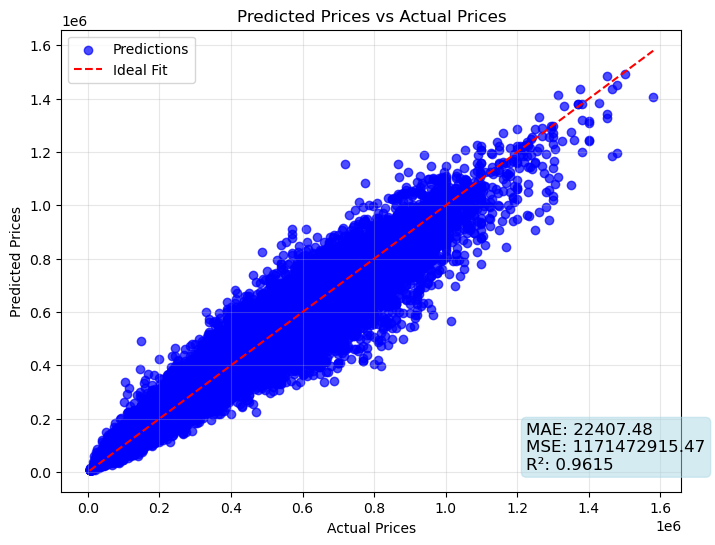

In [32]:
y_pred = best_model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')


# Add labels, title, and legend
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted Prices vs Actual Prices")
plt.legend()
plt.grid(alpha=0.3)

# Display the metrics on the plot
metrics_text = f"MAE: {mae:.2f}\nMSE: {mse:.2f}\nR²: {r2:.4f}"
plt.gca().text(0.75, 0.15, metrics_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top',
               bbox=dict(boxstyle="round", alpha=0.5, color="lightblue"))
# Display the plot
plt.show()


In [ ]:
#Displaying feature importance of columns

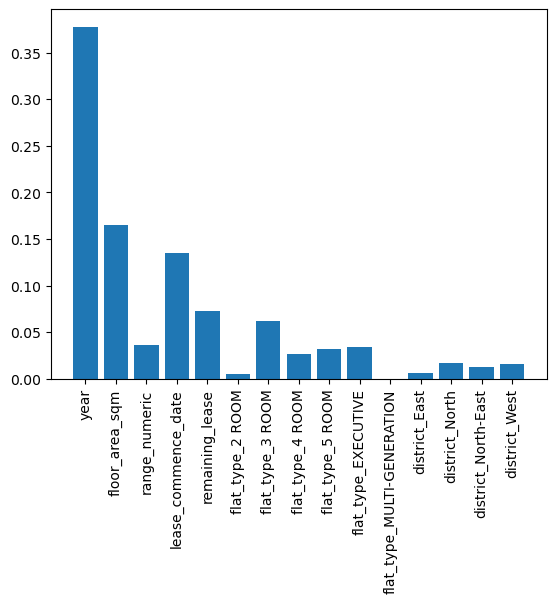

In [26]:
importance = best_model.feature_importances_
plt.bar(X.columns, importance)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Saving the Model as a .pkl file

In [27]:
joblib.dump(best_model, 'price_prediction_model_all.pkl')

['price_prediction_model_all.pkl']

In [ ]:
#Loading the model

In [34]:
model = joblib.load('price_prediction_model_all.pkl')

In [ ]:
#Predicting the resale price for all data entries

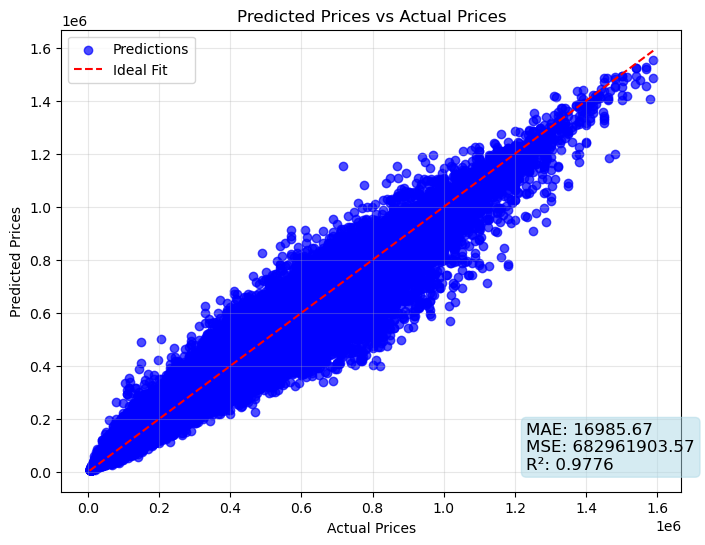

In [35]:
y_pred = best_model.predict(X)

# Metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.7, color='blue', label='Predictions')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Ideal Fit')


# Add labels, title, and legend
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted Prices vs Actual Prices")
plt.legend()
plt.grid(alpha=0.3)

# Display the metrics on the plot
metrics_text = f"MAE: {mae:.2f}\nMSE: {mse:.2f}\nR²: {r2:.4f}"
plt.gca().text(0.75, 0.15, metrics_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top',
               bbox=dict(boxstyle="round", alpha=0.5, color="lightblue"))
# Display the plot
plt.show()


In [ ]:
#Creating a new model with Different Parameters 
#Creating a XGB Model for trials 

In [8]:
# Random Forest Model with Optimized Parameters
rf_model = RandomForestRegressor(
    random_state=42,
    warm_start=True,
    oob_score=False,
    n_estimators=195,
    min_samples_split=6,
    min_samples_leaf =1,
    max_samples= 0.87835296189227,
    max_features='log2',
    max_depth=26,
    ccp_alpha= 0.0009015599241895964,
    n_jobs=-1
        
        
)

# Gradient Boosting Model
xgb_model = XGBRegressor(
    learning_rate= 0.14780965749520883,
    n_estimators= 642, 
    max_depth= 10,
    subsample= 0.9995536910917189, 
    colsample_bytree= 0.9957901593408202, 
    min_child_weight= 4,
    reg_alpha= 0.08280457392135229, 
    reg_lambda= 3.291203585496028,
    random_state=42
)


In [9]:
# Training Models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9957901593408202, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.14780965749520883, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=642, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
#Predicting resale_price from XGBRegressor and RandomForestRegressor
#Using Ensemble to predict price

Random Forest MSE: 801198500.44, R²: 0.97
XGBoost MSE: 813631226.52, R²: 0.97
Ensemble MSE: 780520245.61, R²: 0.97


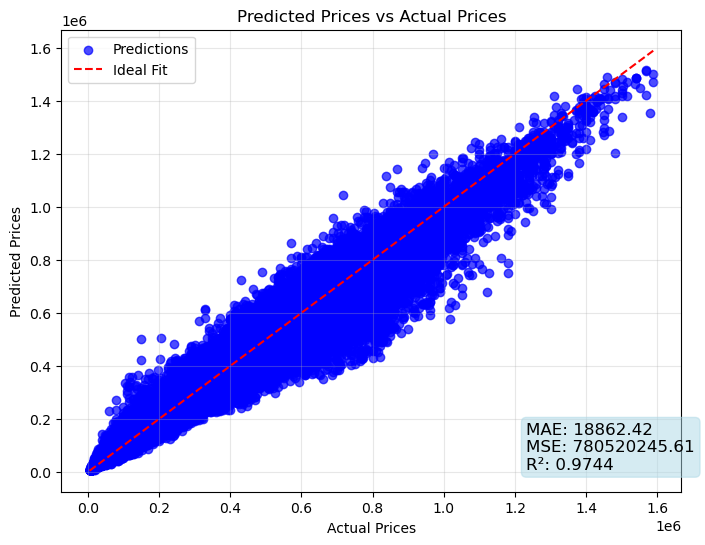

In [11]:
# Predictions
y_pred_rf = rf_model.predict(X)
y_pred_xgb = xgb_model.predict(X)

# Evaluate Models
rf_mae = mean_absolute_error(y, y_pred_rf)
xgb_mae = mean_absolute_error(y, y_pred_xgb)
rf_mse = mean_squared_error(y, y_pred_rf)
xgb_mse = mean_squared_error(y, y_pred_xgb)
rf_r2 = r2_score(y, y_pred_rf)
xgb_r2 = r2_score(y, y_pred_xgb)

print(f"Random Forest MSE: {rf_mse:.2f}, R²: {rf_r2:.2f}")
print(f"XGBoost MSE: {xgb_mse:.2f}, R²: {xgb_r2:.2f}")

# Ensemble (Averaging Predictions)
ensemble_pred = (y_pred_rf + y_pred_xgb) / 2
ensemble_mae = mean_absolute_error(y,ensemble_pred)
ensemble_mse = mean_squared_error(y, ensemble_pred)
ensemble_r2 = r2_score(y, ensemble_pred)

print(f"Ensemble MSE: {ensemble_mse:.2f}, R²: {ensemble_r2:.2f}")

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y, ensemble_pred, alpha=0.7, color='blue', label='Predictions')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Ideal Fit')


# Add labels, title, and legend
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted Prices vs Actual Prices")
plt.legend()
plt.grid(alpha=0.3)

# Display the metrics on the plot
metrics_text = f"MAE: {ensemble_mae:.2f}\nMSE: {ensemble_mse:.2f}\nR²: {ensemble_r2:.4f}"
plt.gca().text(0.75, 0.15, metrics_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top',
               bbox=dict(boxstyle="round", alpha=0.5, color="lightblue"))
# Display the plot
plt.show()


In [ ]:
#Displaying feature importance and displaying residuals for RandomForest model

                       Feature  Importance
0                         year    0.378003
1               floor_area_sqm    0.165394
3          lease_commence_date    0.132931
4              remaining_lease    0.071321
6             flat_type_3 ROOM    0.063725
9          flat_type_EXECUTIVE    0.037166
2                range_numeric    0.035790
8             flat_type_5 ROOM    0.030627
7             flat_type_4 ROOM    0.025810
12              district_North    0.016632
14               district_West    0.016153
13         district_North-East    0.013548
11               district_East    0.006453
5             flat_type_2 ROOM    0.006084
10  flat_type_MULTI-GENERATION    0.000364


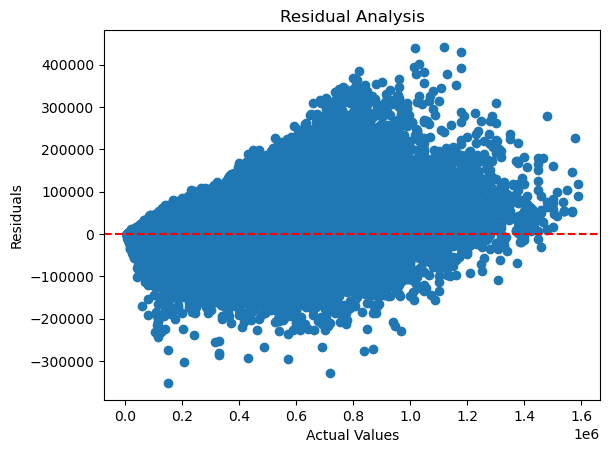

Random Forest Cross-Validation MSE: 1129639459.36
XGBoost Cross-Validation MSE: 995359740.16


In [12]:
# Feature Importance (Random Forest)
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

# Residual Analysis
residuals = y - ensemble_pred
plt.scatter(y, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()

# Cross-Validation
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

print(f"Random Forest Cross-Validation MSE: {-np.mean(cv_scores_rf):.2f}")
print(f"XGBoost Cross-Validation MSE: {-np.mean(cv_scores_xgb):.2f}")

In [ ]:
#Saving Model for future use

In [13]:
joblib.dump(xgb_model, 'price_prediction_model_xgb_v1.pkl')
joblib.dump(rf_model, 'price_prediction_model_rf_v1.pkl')

['price_prediction_model_rf_v1.pkl']

In [ ]:
#Conducting training trials for XGBRegressor 
# With MSE as an indicator

In [12]:

#Best Trial: {'learning_rate': 0.10087761346626611, 'n_estimators': 590, 'max_depth': 11, 'subsample': 0.9958183955552087, 'colsample_bytree': 0.9955580767322605, 'min_child_weight': 5, 'reg_alpha': 0.07393758236869877, 'reg_lambda': 3.6904532645035695}
#Best Trial: {'learning_rate': 0.14780965749520883, 'n_estimators': 642, 'max_depth': 10, 'subsample': 0.9995536910917189, 'colsample_bytree': 0.9957901593408202, 'min_child_weight': 4, 'reg_alpha': 0.08280457392135229, 'reg_lambda': 3.291203585496028}
# Hyperparameter Tuning with Optuna
def objective(trial):
    param = {
        'learning_rate': trial.suggest_float('learning_rate', 0.07, 0.15),  # Focus around best trial, slightly wider
        'n_estimators': trial.suggest_int('n_estimators', 550, 650),         # Focus around best trial, wider range
        'max_depth': trial.suggest_int('max_depth', 10, 15),                   # Expanded depth range to include nearby values
        'subsample': trial.suggest_float('subsample', 0.9, 1.0),              # A tighter range around the best trial
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.9, 1.0), # Focus around the best trial
        'min_child_weight': trial.suggest_int('min_child_weight', 2, 7),      # Slightly expanded range from the best trial
        'reg_alpha': trial.suggest_float('reg_alpha', 0.07, 0.09),             # A wider range than the best trial
        'reg_lambda': trial.suggest_float('reg_lambda', 3, 4),            # A tighter range around the best trial
    }

    model = XGBRegressor(**param, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Run the optimization with the updated parameter search space
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)  # Increased number of trials to explore more options

print("Best Trial:", study.best_trial.params)
  

[I 2025-01-04 20:38:04,274] A new study created in memory with name: no-name-d612bf64-a708-4235-a25f-14e05a65c866
[I 2025-01-04 20:38:43,817] Trial 0 finished with value: 989163368.321962 and parameters: {'learning_rate': 0.07893822795732758, 'n_estimators': 573, 'max_depth': 13, 'subsample': 0.9157653282431119, 'colsample_bytree': 0.9568621757024399, 'min_child_weight': 5, 'reg_alpha': 0.08780410982882068, 'reg_lambda': 3.780183430134579}. Best is trial 0 with value: 989163368.321962.
[I 2025-01-04 20:39:28,034] Trial 1 finished with value: 1042504155.2995279 and parameters: {'learning_rate': 0.14061665615394425, 'n_estimators': 580, 'max_depth': 14, 'subsample': 0.9451703155517179, 'colsample_bytree': 0.9552427680659819, 'min_child_weight': 7, 'reg_alpha': 0.08837007965838778, 'reg_lambda': 3.099108037133835}. Best is trial 0 with value: 989163368.321962.
[I 2025-01-04 20:40:01,881] Trial 2 finished with value: 991030766.0537969 and parameters: {'learning_rate': 0.10445029329508887, 

Best Trial: {'learning_rate': 0.14780965749520883, 'n_estimators': 642, 'max_depth': 10, 'subsample': 0.9995536910917189, 'colsample_bytree': 0.9957901593408202, 'min_child_weight': 4, 'reg_alpha': 0.08280457392135229, 'reg_lambda': 3.291203585496028}


In [ ]:
#Using the best parameters for fitting

In [52]:
# Gradient Boosting Model
xgb_model = XGBRegressor(
    learning_rate= 0.10087761346626611, 
    n_estimators= 590, 
    max_depth= 11,
    subsample = 0.9958183955552087,
    colsample_bytree= 0.9955580767322605,
    min_child_weight= 5,
    reg_alpha= 0.07393758236869877,
    reg_lambda= 3.6904532645035695
)

In [53]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9955580767322605, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.10087761346626611, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=590, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Plotting resale_price predictions from XGB model and actual price
#MSE MAE and R^2 used to evaluate model

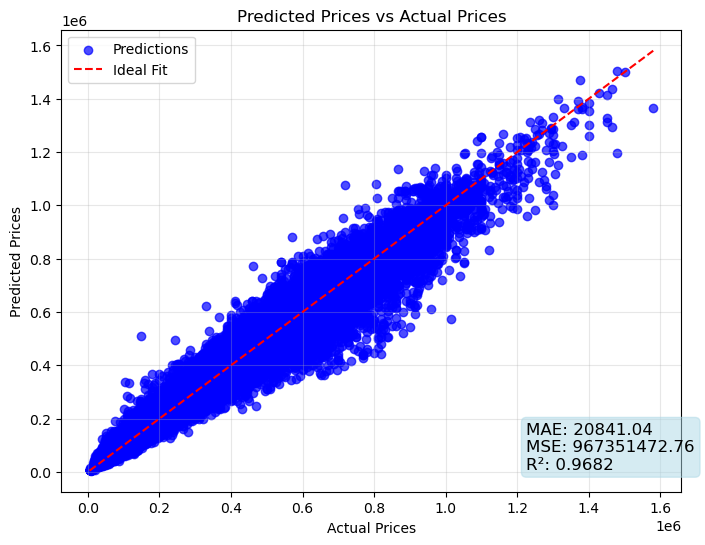

In [54]:
y_pred = xgb_model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')


# Add labels, title, and legend
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted Prices vs Actual Prices")
plt.legend()
plt.grid(alpha=0.3)

# Display the metrics on the plot
metrics_text = f"MAE: {mae:.2f}\nMSE: {mse:.2f}\nR²: {r2:.4f}"
plt.gca().text(0.75, 0.15, metrics_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top',
               bbox=dict(boxstyle="round", alpha=0.5, color="lightblue"))
# Display the plot
plt.show()


In [55]:
joblib.dump(xgb_model, 'price_prediction_model_xgb.pkl')

['price_prediction_model_xgb.pkl']

In [ ]:
#Reducing dataset to decrease trial duration

In [8]:
X_train_sample = X_train.sample(frac=0.5, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]


In [ ]:
#Conducting Trial for RandomForestRegressor to get best parameters
#MSE used as an indicator

In [13]:

#Best Parameters: {'n_estimators': 187, 'max_depth': 25, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'log2'}
#Best Parameters: {'n_estimators': 206, 'max_depth': 26, 'min_samples_split': 7, 'max_samples': 0.7960990270854795, 'ccp_alpha': 0.00160109116126429}
#Best Parameters: {'n_estimators': 191, 'max_depth': 26, 'min_samples_split': 6, 'max_samples': 0.87835296189227, 'ccp_alpha': 0.0009015599241895964}
#Best Parameters: {'n_estimators': 199, 'max_depth': 27, 'min_samples_split': 6, 'max_samples': 0.8786272909717915, 'ccp_alpha': 0.0008503414575224985}
def objective(trial):
    param = {
    'n_estimators': trial.suggest_int('n_estimators', 190, 210),  # Number of trees
    'max_depth': trial.suggest_int('max_depth', 15, 30),          # Depth of trees
    'min_samples_split': trial.suggest_int('min_samples_split', 5, 10),  # Min samples to split a node
    'max_samples': trial.suggest_float('max_samples', 0.7, 0.9),         # Subsampling for bagging
    'ccp_alpha': trial.suggest_float('ccp_alpha', 0.0005, 0.002, log=True),  # Pruning  
}

    model = RandomForestRegressor(**param, 
        random_state=42,
        warm_start= True,
        oob_score= True,
        n_jobs=-1,
        min_samples_leaf= 1,
        max_features= 'log2',
        n_estimators = 191, 
        max_depth = 26,
        min_samples_split= 6,
        max_samples= 0.87835296189227,
        ccp_alpha= 0.0009015599241895964
       
        )
    model.fit(X_train_sample, y_train_sample)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Run the optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)  # Increase number of trials for broader exploration

print("Best Parameters:", study.best_trial.params)


[I 2025-01-04 20:56:52,661] A new study created in memory with name: no-name-5de5c7c5-cdf0-483c-b495-720f4a8e258b
[I 2025-01-04 20:57:28,765] Trial 0 finished with value: 1197987966.308119 and parameters: {'n_estimators': 200, 'max_depth': 23, 'min_samples_split': 10, 'max_samples': 0.8815632256049019, 'ccp_alpha': 0.0005253974050677141}. Best is trial 0 with value: 1197987966.308119.
[I 2025-01-04 20:57:55,266] Trial 1 finished with value: 1662744413.9254467 and parameters: {'n_estimators': 197, 'max_depth': 15, 'min_samples_split': 9, 'max_samples': 0.8509543837940341, 'ccp_alpha': 0.0006308791522653988}. Best is trial 0 with value: 1197987966.308119.
[I 2025-01-04 20:58:27,025] Trial 2 finished with value: 1317236290.9430952 and parameters: {'n_estimators': 203, 'max_depth': 18, 'min_samples_split': 7, 'max_samples': 0.8384930446258082, 'ccp_alpha': 0.0008545146072724527}. Best is trial 0 with value: 1197987966.308119.
[I 2025-01-04 20:59:04,867] Trial 3 finished with value: 1188041

Best Parameters: {'n_estimators': 199, 'max_depth': 27, 'min_samples_split': 6, 'max_samples': 0.8786272909717915, 'ccp_alpha': 0.0008503414575224985}
